<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Book-Recommendation-system/blob/main/Book_Recommandation_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and recommend items and improve sales. </u></b>

# <b><u>Problem Statement: </u></b>

####During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


####In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
####Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

####Personal recommendation systems have been emerged to conduct effective search which related booksbased on user rating and interest.The proposed system used the K-NN Cosine Distance function to measure distance and Cosine Similarity function to find Similarity between the book clusters also we implemented SVD system that give us good recommandation.

## **About Recommendation Engines**
A recommendation engine, also known as a recommender system, is software that analyzes available data to make suggestions for something that a user might be interested in.

A recommendation engine can be used for recommending other products besides books; for example a recommendation engine can be used to suggest movies or t-shirts or any other product based on things like similar customers who bought similar products. On Amazon’s ecommerce website, you can see an area populated by a recommendation engine, it’s the area that you see “Customers who viewed this item also viewed” and “Customers who bought this item also bought” lists.

A recommendation system is usually built using 3 techniques which are **content-based filtering, collaborative filtering, and a combination of both**.

* **Content-based filtering**: 
* **Collaborative filtering:**
* **Hybrid Filtering Method:**


###In this project, we will use the **Collaborative based filtering** method to build a book recommender system.

###**Collaborative based filtering**
###Collaborative filtering (CF) systems work by collecting user feedback in the form of ratings for items in a given domain and exploiting similarities in rating behavior among several users in determining how to recommend an item.CF accumulates customer product ratings, identifies customers with common ratings, and offers recommendations based on inter-customer comparisons. It’s based on the idea that people who agree in their evaluations of certain items in the past are likely to agree again in the future. For example, most people ask their trusted friends for restaurant or movie suggestions.

###Collaborative filtering models are based on an assumption that people like things similar to other things they like, and things that are liked by other people with similar taste.

###Two major approaches of collaborative filtering
###1. **Memory-based approach**: This approach is based on taking a matrix of preferences for items by users using this matrix to predict missing preferences and recommend items with high predictions
###2. **Model-based approach**: In this approach, CF models are developed using machine learning algorithms to predict a user’s rating of unrated items. Some of these models/techniques include: k-nearest neighbours, clustering, matrix factorization


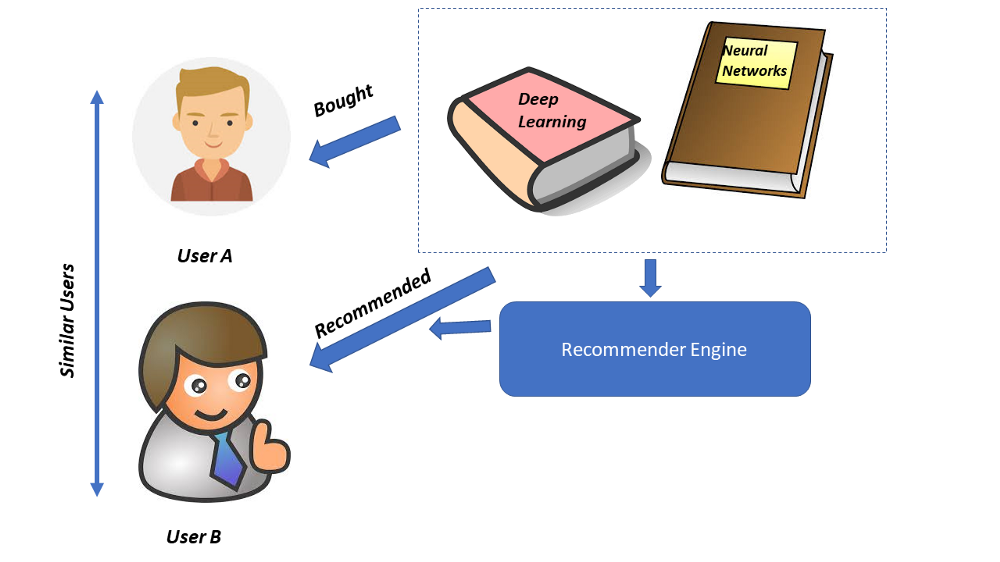

To explain collaborative filtering in simple words, consider the above users- User A and User B. User A and User B are considered similar users because they often bought similar or the same books in the past. Now, User A bought the Deep Learning and Neural Networks books. Therefore, when User B browses for books, he will be recommended Deep Learning and Neural Networks because User A( who User B has common interests with) bought those.

##**Dataset Description**
The Book-Crossing dataset comprises 3 files which contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

* **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
*  **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
*  **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Importing Required Libraries**

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


###**First Dataset Lookup**

In [5]:
#Reading Books data
book_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System Team Capstone Project/Data Files/Books.csv' ,sep=",",error_bad_lines=False, encoding='latin-1')

In [6]:
#look for top 5 rows of dataset
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#information about columns of dataset
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
#Considering only those columns which can be useable.
book_df=book_df[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]

In [9]:
#Columns name are look tricky let's give simplified names 
book=book_df.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'})

In [10]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)

In [11]:
#Get the unique values of Year-Of-Publication	
book.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from below that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as year in dataset due to some errors in csv file. Also some of the entries are strings and same years have been entered as numbers in some places.

In [12]:
#Checking the rows having 'DK Publishing Inc' and 'Gallimard' as year
book.loc[(book.year == 'DK Publishing Inc') |( book.year == 'Gallimard'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


From above dataframe we can see that there has been a shift in the values of this three rows.

Let's bring them in the right place.

In [13]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
book.loc[book.ISBN == '0789466953','year'] = 2000
book.loc[book.ISBN == '0789466953','author'] = "James Buckley"
book.loc[book.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [14]:
#ISBN '078946697X'
book.loc[book.ISBN == '078946697X','year'] = 2000
book.loc[book.ISBN == '078946697X','author'] = "Michael Teitelbaum"
book.loc[book.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [15]:
#ISBN '2070426769'
book.loc[book.ISBN == '2070426769','year'] = 2003
book.loc[book.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
book.loc[book.ISBN == '2070426769','publisher'] = "Gallimard"
book.loc[book.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [16]:
#Rechecking
book.loc[(book.ISBN == '0789466953') | (book.ISBN == '078946697X') | (book.ISBN == '2070426769'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [17]:
# Correcting the dtypes of year
book.year = pd.to_numeric(book.year, errors='coerce')
#Checking dtype
book.year.dtype

dtype('int64')

In [18]:
# Printing unique sorted years of books
print(sorted(book['year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


####Since, the value 0 is invalid in Year-Of-Publication also the year mentioned was beyond 2020 for some entries whereas the dataset was created in 2004.So we fill those value with Nan's.

In [19]:
# Setting year 0 and years above 2004 as nan
book.loc[(book['year'] > 2004) | (book['year']==0),'year'] = np.NAN

In [20]:
# checking for missing values
book.isnull().sum()

ISBN         0   
title        0   
author       1   
year         4690
publisher    2   
dtype: int64

In [21]:
#Replacing NaNs with median value of year feature
book.year.fillna(round(book.year.median()), inplace=True)

In [22]:
#Resetting the dtype as int32
book.year = book.year.astype(np.int64)

In [23]:
#exploring 'publisher' column
book.loc[book.publisher.isnull(),:]

,ISBN,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In publisher column we've two missing values.

Here, we replace these nan's with 'other'

In [24]:
#Replacing missing values with 'other'
book.loc[(book.ISBN == '193169656X'),'publisher'] = 'other'
book.loc[(book.ISBN == '1931696993'),'publisher'] = 'other'

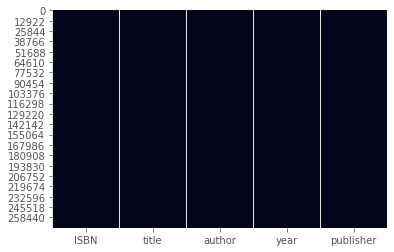

In [25]:
# Checking Null Value by plotting Heatmap
sns.heatmap(book.isnull(), cbar=False)

In [26]:
# Checking for any duplicate values 
len(book[book.duplicated()])
# No duplicate

0

###**Second Dataset lookup**

In [27]:
#let's read the user dataset 
user_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System Team Capstone Project/Data Files/Users.csv',sep=",",error_bad_lines=False, encoding='latin-1')

In [28]:
#looking for the top 5 rows 
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
#information about columns of dataset
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [30]:
##Columns name are look tricky let's give them simplified names 
user=user_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'})

In [31]:
#let's look for missing data
missing_data = pd.DataFrame([user.isnull().sum(),user.isnull().sum()*100.0/user.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
user_id,0.0,0.000000
location,0.0,0.000000
age,110762.0,39.719857


'Age' column having highest number of missing values that is 40 % .We have deal with missing values.

Age value's below 5 and above 95 do not make much sense for our book rating case...hence replacing these by NaNs

In [32]:
# Replacing age below 5 and above 90 by NaNs
user.loc[(user.age > 95) | (user.age < 5), 'age'] = np.nan

In [33]:
#Now, Replacing NaNs with mean
user['age'].fillna((user['age'].mean()), inplace=True)

In [34]:
#setting the data type as int
user.age = user.age.astype(np.int64)

In [35]:
# Getting unique age values in sorted manner
print(sorted(user.age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


In [36]:
user.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

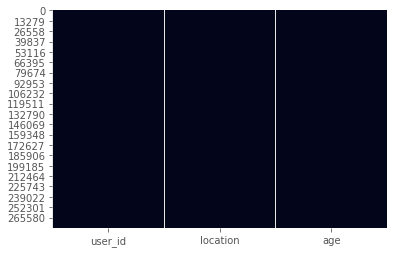

In [37]:
# Checking Null Value by plotting Heatmap
sns.heatmap(user.isnull(), cbar=False)

In [38]:
# Checking for any duplicate values 
len(user[user.duplicated()])
# No duplicate

0

###**Third dataset lookup**

In [39]:
#let's read the rating dataset 
rating_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System Team Capstone Project/Data Files/Ratings.csv',sep=",",error_bad_lines=False, encoding='latin-1')

In [40]:
#let's look for top 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
#information about columns of dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [42]:
##Columns name are look tricky let's give them simplified names 
rating = rating_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'})

Ratings dataset should have books only which exist in our books dataset.

In [43]:
ratings_new = rating[rating.ISBN.isin(book.ISBN)]
rating.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

Now, We'll only take the **ISBNs** that also belongs to the main **books** set.

In [44]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['user_id'].isin(user['user_id'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


Text(0.5, 1.0, 'ratings count')

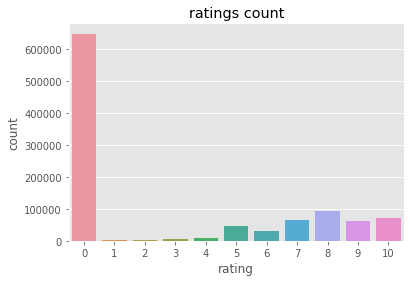

In [45]:
# Plotting count of rating to see how it's distributed
sns.countplot(x='rating',data=ratings_new)
plt.title('ratings count')

####From above graph we can see that books have rating in between 0-10.From above graph we can see that we have lot of ratings with value 0.Data is unevenly distrubuted.Here the ratings from 0 as mentioned in our dataset decription ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [46]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['rating'] != 0]
ratings_implicit = ratings_new[ratings_new['rating'] == 0]

In [47]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


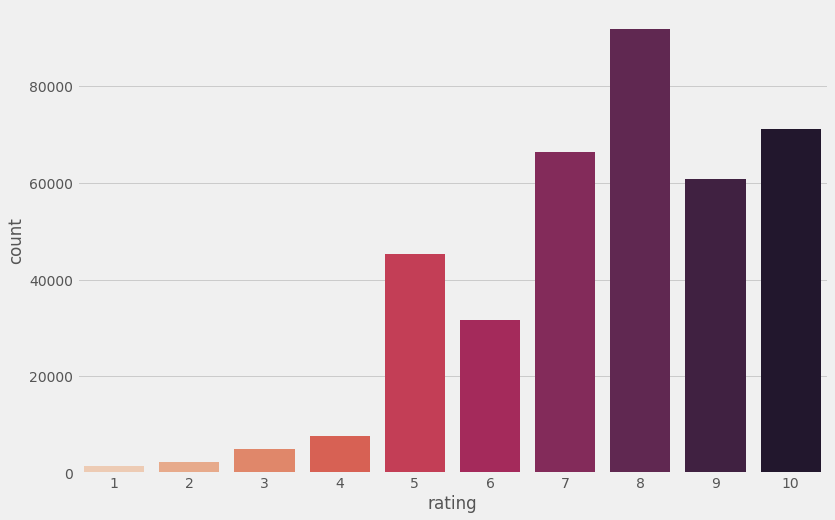

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='rating', palette='rocket_r')

#### Now, This countplot of rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times then 10 & 7.

Let's look for missing values in rating dataset

In [49]:
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [50]:
(user.shape,book.shape,rating.shape) # final shape of each dataset 

((278858, 3), (271360, 5), (1149780, 3))

##**Data Visualisation**

####Let's explore the data about how many books,users and their ratings we have in our dataset.

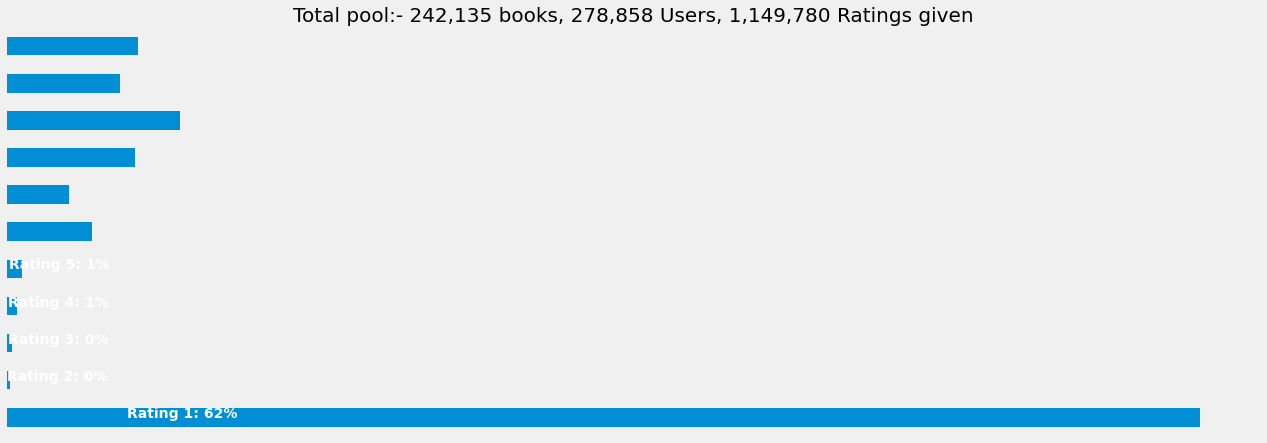

In [51]:
p = rating.groupby('rating')['rating'].agg(['count'])

# get book count
products_count = book['title'].nunique()
# get customer count
users_count = user['user_id'].nunique()
# get rating count
rating_count = rating['rating'].count()
#Plottng graph
ax = p.plot(kind = 'barh', legend = False, figsize = (20,7))
plt.title('Total pool:- {:,} books, {:,} Users, {:,} Ratings given'.format(products_count, users_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/10, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

####Here we can see that we have data
####1)Number of books - 242134 
####2)Number of users -278858
####3)Total Number of Ratings- 1149780

In [52]:
#Let's explore about books 
book['title'].value_counts()

Selected Poems                                                                                27
Little Women                                                                                  24
Wuthering Heights                                                                             21
The Secret Garden                                                                             20
Dracula                                                                                       20
                                                                                              ..
Clive Barker's A-Z Horror                                                                     1 
BEASTLY TALES R L STINES GHOSTS OF FEAR STREET CREEPY COLLECTION 2 (GHOSTS OF FEAR STREET)    1 
Moonbow in the Mist                                                                           1 
Ten Little Eggs                                                                               1 
Garfield Makes It Big (Garfiel

Text(0.5, 1.0, 'Top 10 books')

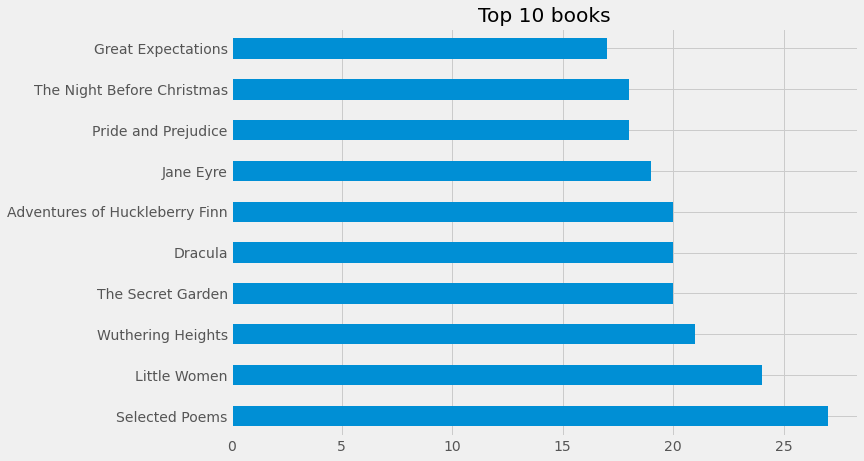

In [53]:
# Top 10 Products
ax = book['title'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))
plt.title('Top 10 books') 

####From above graph we can see that selected poems are highest in number.Bar plot shows us popular books.

In [54]:
#Let's explore about users.
rating['user_id'].value_counts()

11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
          ...  
158698    1    
17920     1    
277135    1    
275086    1    
187812    1    
Name: user_id, Length: 105283, dtype: int64

Text(0.5, 1.0, 'Top 10 user_ids')

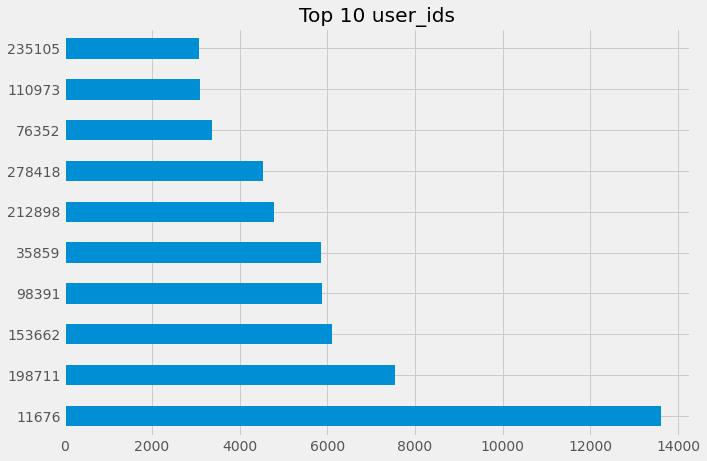

In [55]:
# Top 10 User Id
ax = rating['user_id'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))
plt.title("Top 10 user_ids")

####From above bar plot we can see that the user with user id 11676 has read more than 13500 books it's something extraordinary thing we can see here.

In [56]:
#Let's explore about Users-Locality
list(user['location'].value_counts().index[0:10])

['london, england, united kingdom',
 'toronto, ontario, canada',
 'sydney, new south wales, australia',
 'melbourne, victoria, australia',
 'portland, oregon, usa',
 'chicago, illinois, usa',
 'seattle, washington, usa',
 'new york, new york, usa',
 'madrid, madrid, spain',
 'vancouver, british columbia, canada']

Text(0.5, 1.0, 'No of readers from each city (Top 10)')

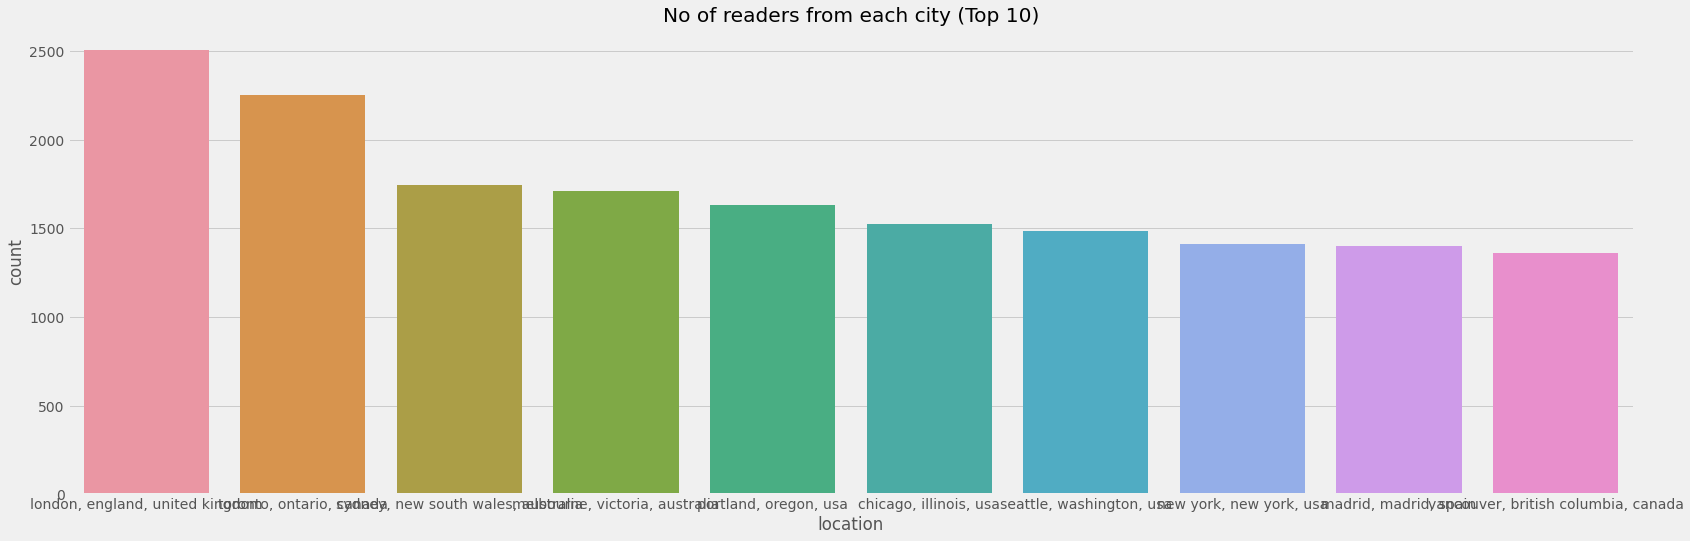

In [57]:
#Let's explore about Locations of top users
plt.figure(figsize=(25,8))
sns.countplot(x="location", data=user,order=user['location'].value_counts().index[0:10])
plt.title("No of readers from each city (Top 10)")

####Here we can see that user with locations London,england,united kingdom,toronto,ontario,canda are high in numbers.

Text(0.5, 1.0, 'No of books by an author (Top 15)')

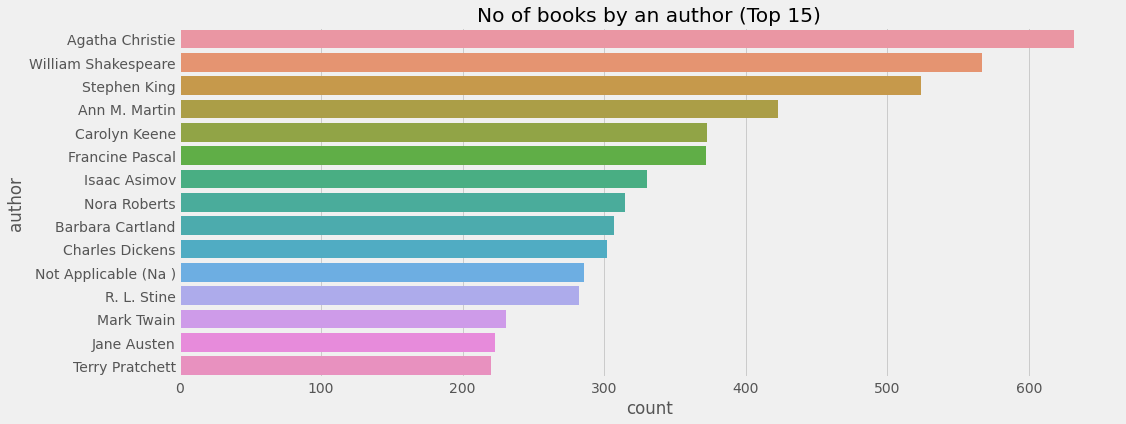

In [58]:
#Let's explore about authors
plt.figure(figsize=(15,6))
sns.countplot(y="author", data=book,order=book['author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

####From above bar plot we can see that autors Agatha Christie,William Shakespeare,Stephen King,Ann M. Martin,Carolyn keene are top authors.

##**Collaborative Filtering Using KNN ( k-Nearest Neighbors)** 

**kNN(k-Nearest Neighbors)** as an algorithm seems to be inspired from real life. The full k-nearest neighbors algorithm works much in the way some of us ask for recommendations from our friends. First, we start with people whose taste we feel we share, and then we ask a bunch of them to recommend something to us. If many of them recommend the same thing, we deduce that we’ll like it as well. Our behaviour is guided by the friends we grew up with.kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

Before we start we assume that users who given ratings more than 200 are users who read atleast 20 books(suppose on user given rating 10/10 so minimum he read books(200 ratings/10 ratings per book=20).For statisfical significance we should consider only the data of user who given more than 200 ratings
Reducing the dataset size,we have created another dataframe bookrating which contains users who have rated atleast 200 books and Books which have atleast 100 no of ratings.

In [60]:
#Users with more than 200 ratings 
numbers1 = ratings_explicit['user_id'].value_counts()
ratings = ratings_explicit[ratings_explicit['user_id'].isin(numbers1[numbers1 >= 200].index)]
#Books with more than 100 Ratings
number2 = ratings_explicit['rating'].value_counts()
ratings = ratings_explicit[ratings_explicit['rating'].isin(number2[number2 >= 100].index)]

####The dataset 'Ratings' and 'Books' have common column 'ISBN' so create new dataframe merging the two dataframes.

In [61]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(ratings, book, on='ISBN')
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday


####Now we will group by book titles and create a new column for total rating count.

In [62]:
rating_count_df =books_with_rating.groupby('title')['rating'].count().reset_index() #grouping

In [63]:
#Print top 5 rows of dataset
rating_count_df.head()

,title,rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [64]:
#Rename the column rating with total ratings
rating_count_df.rename(columns={'rating':'total_ratings'},inplace=True)

####Now we will combine the books_with_rating with the rating_count_df data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [65]:
#Merging the dataframes
totalRatingCount_df = books_with_rating.merge(rating_count_df, left_on = 'title', right_on = 'title', how = 'left')
totalRatingCount_df.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,5
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,1
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,1
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,366
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,366


####We wiil consider the only books having minimum total 50 ratings.

In [66]:
#let's keep threshold value 50 
popularity_threshold = 50
rating_popular_book = totalRatingCount_df.query('total_ratings >= @popularity_threshold')
print(rating_popular_book.head())

   user_id        ISBN  rating  ...  year  publisher  total_ratings
3  276744   038550120X  7       ...  2001  Doubleday  366          
4  11676    038550120X  10      ...  2001  Doubleday  366          
5  16877    038550120X  9       ...  2001  Doubleday  366          
6  17975    038550120X  6       ...  2001  Doubleday  366          
7  20806    038550120X  6       ...  2001  Doubleday  366          

[5 rows x 8 columns]


####Now it's time to merge the 'users' dataframe with 'rating_popular_book' dataframe 

In [67]:
combined = rating_popular_book.merge(user, left_on = 'user_id', right_on = 'user_id', how = 'left')## merging the dataframes

In [68]:
combined.shape

(65477, 10)

In [69]:
#Comibned dataframe's duplicate values should be drop  
combined.drop_duplicates(['user_id','title'],inplace=True)

In [70]:
# Creating pivot table
pivot_matrix=combined.pivot(index='title',values='rating',columns='user_id')
# Returning top 5 rows
pivot_matrix.head()

user_id,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,367,383,388,424,433,440,446,453,486,487,493,496,503,505,507,...,278469,278483,278522,278525,278535,278541,278543,278550,278551,278552,278554,278556,278561,278582,278586,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Filling Nan values to 0
pivot_matrix.fillna(0, inplace=True)

In [72]:
#Print top 5 rows
pivot_matrix.head()

user_id,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,367,383,388,424,433,440,446,453,486,487,493,496,503,505,507,...,278469,278483,278522,278525,278535,278541,278543,278550,278551,278552,278554,278556,278561,278582,278586,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
from scipy.sparse import csr_matrix
#csr is compressed sparse matrix since there are lots of NAn-->0
book_sparse = csr_matrix(pivot_matrix)

In [74]:
# importing library
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [75]:
# metric used for evaluation is cosine and algorithm is brute
model = NearestNeighbors(metric = 'cosine',algorithm='brute')

In [76]:
#Let's fit the model 
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [77]:
#Generating random book indices out of the book_matrix
random_book = np.random.choice(pivot_matrix.shape[0])
print(random_book)
print(pivot_matrix.iloc[random_book,:].values.reshape(1,-1))
#Apply the k neighbors to fiited model this will create clusters
distances, indices = model.kneighbors(pivot_matrix.iloc[random_book,:].values.reshape(1, -1), n_neighbors = 6)
pivot_matrix.index[random_book]

603
[[0. 0. 0. ... 0. 0. 0.]]


'Thinner'

In [78]:
#Printing the random book name and suggested books.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[random_book]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Thinner:

1: Christine, with distance of 0.7713499524126026:
2: The Dark Half, with distance of 0.7952409950891572:
3: Misery, with distance of 0.7980038973090149:
4: Four Past Midnight, with distance of 0.804130327478992:
5: Rose Madder, with distance of 0.8067711334900447:


In [79]:
#Function to get recommandation for known books from our dataset.
def recommand_books(book_name):
   book_id = np.where(pivot_matrix.index==book_name)[0][0]
   print(book_id)
   print(pivot_matrix.iloc[book_id,:].values.reshape(1,-1))
   distances ,suggestions = model.kneighbors(pivot_matrix.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 6)
   
   for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[book_id]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[suggestions.flatten()[i]], distances.flatten()[i]))

In [80]:
#Let's try to get recommandation for book 'Me Talk Pretty One Day'
recommand_books('Me Talk Pretty One Day')

290
[[0. 0. 0. ... 0. 0. 0.]]
Recommendations for Me Talk Pretty One Day:

1: Naked, with distance of 0.8858074662798368:
2: Tears of the Giraffe (No.1 Ladies Detective Agency), with distance of 0.9157177430024384:
3: The Devil Wears Prada : A Novel, with distance of 0.9170718585150509:
4: The Idiot Girls' Action Adventure Club, with distance of 0.9264461175139407:
5: High Fidelity, with distance of 0.9266002809092454:


####Yes we made it! we have good recommandation here with distances near to value 1.

##**Recommending Similar Books using Correlation**

In [81]:
#Creating pivot table using the user id,ISBN and ratings
matrix = combined.pivot_table(index='user_id', columns='ISBN', values = 'rating').fillna(0)

In [82]:
#Creating the dataframe containg ISBN, rating & Ratingcount
average_ratings = pd.DataFrame(rating.groupby('ISBN')['rating'].mean())
average_ratings['ratingCount'] = pd.DataFrame(rating.groupby('ISBN')['rating'].count())
average_ratings.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [83]:
#Let's give random book name as input 
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: 1984
Enter number of books to recommend: 5


In [84]:
#Creating correlation recommendation system
isbn = book.loc[book['title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Correlation'])
corr = correlation.join(average_ratings['ratingCount'])

res = corr.sort_values('Correlation', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), book, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



,ISBN,title,author,year,publisher
0,0451526341,Animal Farm,George Orwell,2004,Signet
1,0060929871,Brave New World,Aldous Huxley,1998,Perennial
2,0375418954,The Fourth Hand,John Irving,2001,Random House Audio
3,0060575913,Coraline,Neil Gaiman,2004,HarperTrophy
4,0743504623,Fatal Voyage,Kathy Reichs,2001,Simon &amp; Schuster Audio


##**Collaborative Filtering : Item-Item Filtering**

####Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

In [85]:
#create new dataframe
new_df = pd.DataFrame()
new_df['ISBN'] = combined['ISBN']
new_df['rating'] = combined['rating']
new_df['user_id'] = combined['user_id']
new_df = new_df[['user_id','rating']].groupby(new_df['ISBN'])

In [86]:
type(new_df) 

pandas.core.groupby.generic.DataFrameGroupBy

In [87]:
new_df.groups.keys()#ISBN

dict_keys(['0001047973', '0002558122', '000649840X', '000649840x', '002542730X', '0048231398', '0060008024', '0060008032', '0060086246', '0060094818', '0060096195', '0060129565', '0060158638', '0060168013', '006016848X', '0060171928', '006017322X', '0060173289', '0060175400', '0060194448', '0060198133', '0060199652', '0060283122', '0060283130', '0060288140', '0060391626', '0060392452', '0060502258', '0060512806', '0060512822', '0060518286', '0060531045', '0060541814', '0060541830', '0060575913', '0060584750', '0060804548', '0060809833', '0060830956', '0060915544', '0060916508', '0060921145', '0060922532', '0060926317', '0060928336', '0060929790', '0060929871', '0060930535', '0060932759', '0060934417', '0060935464', '0060938455', '0060958022', '0060958324', '0060959037', '0060976845', '0060977477', '0060977493', '0060987103', '0060987529', '0060987561', '006099486X', '006099486x', '0061001023', '0061007501', '0061009059', '006101351X', '006101351x', '0061015725', '0061043354', '00610832

In [88]:
new_df.head()

,user_id,rating
0,276744,7
1,11676,10
2,16877,9
3,17975,6
4,20806,6
...,...,...
65472,268544,9
65473,268932,8
65474,273197,10
65475,273976,8


First we will create code which is responsible for building the item-item similarity matrix.We first convert build a list of dictionary. Each dictionary corresponds to a single book. The user_id is the key, while rating given by the user for the book is its value.

In [89]:
listOfDictonaries=[] #Each dictonary corresponds to single book
indexMap = {} #Dictonary 
reverseIndexMap = {}# Reverse of dictonary 
count=0 #counting rating

# create for loop 
for groupKey in new_df.groups.keys():#here new_df.group.keys consist of ISBN as key
    tempDict={}# Creating temp dictinory
    groupDF = new_df.get_group(groupKey)#Created Dataframe using user-id,isbn,rating
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[count]=groupKey
    reverseIndexMap[groupKey] = count
    count=count+1
    listOfDictonaries.append(tempDict)

In [90]:
listOfDictonaries[0:2] #Here we created list of dictionaries {user_id:ratings}

[{11944: 9, 23902: 9},
 {71837: 10,
  81274: 8,
  131398: 9,
  191521: 9,
  196118: 8,
  201537: 8,
  202664: 8,
  216420: 5,
  236173: 9}]

We then use sklearn's DictVectorizer() function to create vectors corresponding to each book. We are trying to create a vector space with users as column vectors. Each point in the vector space represents a book. Rating of the book given an user is its magnitude. We then calculate similarity/distance between books in this vector space.

In [91]:
from sklearn.feature_extraction import DictVectorizer

In [92]:
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)#consine_similarity function to calculate pairwise similarity matrix
print(pairwiseSimilarity)#Binary one hot encoding

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [93]:
#Fuction for details of book here we give input
def printBookDetails(bookID):
    print(combined[combined['ISBN']==bookID]['title'].values[0])
    print(combined[combined['ISBN']==bookID]['author'].values[0])
    """
    print("Title:", combined[combined['ISBN']==bookID]['title'].values[0])
    print("Author:",combined[combined['ISBN']==bookID]['author'].values[0])
    
    """
#Fuction for top recommendations
def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if combined[combined['ISBN']==indexMap[i]]['title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(combined[combined['ISBN']==indexMap[i]]['title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(combined[combined['ISBN']==indexMap[i]]['title'].values[0])
    return collaborative

In [94]:
k = list(combined['title'])
m = list(combined['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
1984
George Orwell

RECOMMENDATIONS:

Brave New World
Aldous Huxley
Coraline
Neil Gaiman
The Fourth Hand
John Irving
Fatal Voyage
Kathy Reichs
Contact
Carl Sagan


###**SVD** is a popular method for dimensionality reduction. However, it works better with sparse data. Here sparse data refers to the data with many zero values.Truncated SVD factorized data matrix where the number of columns is equal to the truncation. It drops the digits after the decimal place for shorting the value of float digits mathematically. 

In [95]:
#Create New pivot 
rating_pivot2 = combined.pivot(index = 'user_id', columns = 'title', values = 'rating').fillna(0)

In [96]:
#Print top 5 rows 
rating_pivot2.head(2)

title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),A Darkness More Than Night,A Fine Balance,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Lesson Before Dying (Vintage Contemporaries (Paperback)),A Man Named Dave: A Story of Triumph and Forgiveness,A Man in Full,A Map of the World,A Painted House,A Patchwork Planet,A Prayer for Owen Meany,A Separate Peace,A Thousand Acres (Ballantine Reader's Circle),A Time to Kill,A Virtuous Woman (Oprah's Book Club (Paperback)),A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,A Widow for One Year,A Wrinkle In Time,A Wrinkle in Time,A Year in Provence,ANGELA'S ASHES,About a Boy,About a Boy (Movie Tie-In),Absolute Power,Acceptable Risk,"Ahab's Wife: Or, The Star-Gazer: A Novel",Airframe,All Around the Town,All I Really Need to Know,...,To the Nines: A Stephanie Plum Novel,Total Control,Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2),"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Two for the Dough,Under the Tuscan Sun,Unnatural Exposure,Unspeakable,Vinegar Hill (Oprah's Book Club (Paperback)),Violets Are Blue,Visions of Sugar Plums,Voyager,Watchers,Watership Down,We Were the Mulvaneys,We'll Meet Again,"Welcome to the World, Baby Girl!",What Looks Like Crazy On An Ordinary Day,What to Expect When You're Expecting (Revised Edition),What to Expect the First Year,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),Where the Red Fern Grows,While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),White Teeth: A Novel,Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,Wicked: The Life and Times of the Wicked Witch of the West,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#Check The shape
rating_pivot2.shape

(24863, 651)

In [98]:
X = rating_pivot2.values.T
X.shape

(651, 24863)

In [99]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
#Fitting the data set into truncatedSVD
matrix = SVD.fit_transform(X)
matrix.shape

(651, 12)

In [100]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(651, 651)

In [101]:
book_title = rating_pivot2.columns #title
book_list = list(book_title) #created list
coffey_hands =book_list.index(bookName) #index
print(coffey_hands)

0


In [102]:
#Get recommendation using correlation
corr_coffey_hands  = corr[coffey_hands]
list(book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.95)])

['Animal Farm',
 'Brave New World',
 'Catch 22',
 "Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
 "The Hitchhiker's Guide to the Galaxy",
 'Watership Down']

Yes! Here we get good recommendation.

##**Matrix Factorization**
####The main assumption behind matrix factorisation is that there exists a pretty low dimensional latent space of features in which we can represent both users and items and such that the interaction between a user and an item can be obtained by computing the dot product of corresponding dense vectors in that space.

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [120]:
pip install surprise

In [121]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [122]:
df=combined.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'ISBN', 'rating']], reader)

In [123]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.639229
test_mae     1.274951
fit_time     2.259688
test_time    0.170090
dtype: float64

In [107]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.507730
test_mae     2.087922
fit_time     3.964011
test_time    0.143051
dtype: float64

Here we can observe that the svd gives good result as compared to nmf model.

In [124]:
#Optimising the svd model
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6324230014329009
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


Train-Test split

In [125]:
trainset, testset = train_test_split(data, test_size=0.2)# Splitting in train test model

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset) 

In [126]:
pred_df = pd.DataFrame(predictions, columns=['user_id', 'ISBN', 'actual_rating', 'pred_rating','details'])
pred_df['pred_rating_round'] = pred_df['pred_rating'].round()
pred_df['abs_err'] = abs(pred_df['pred_rating'] - pred_df['actual_rating'])
pred_df.sample(5)

,user_id,ISBN,actual_rating,pred_rating,details,pred_rating_round,abs_err
12832,206305,0452282829,7.0,7.753191,{'was_impossible': False},8.0,0.753191
5272,246776,0316602051,8.0,7.622215,{'was_impossible': False},8.0,0.377785
12896,88203,0971880107,4.0,5.093980,{'was_impossible': False},5.0,1.093980
3977,251149,0312282990,9.0,7.797665,{'was_impossible': False},8.0,1.202335
3984,117803,0743418166,9.0,7.523595,{'was_impossible': False},8.0,1.476405


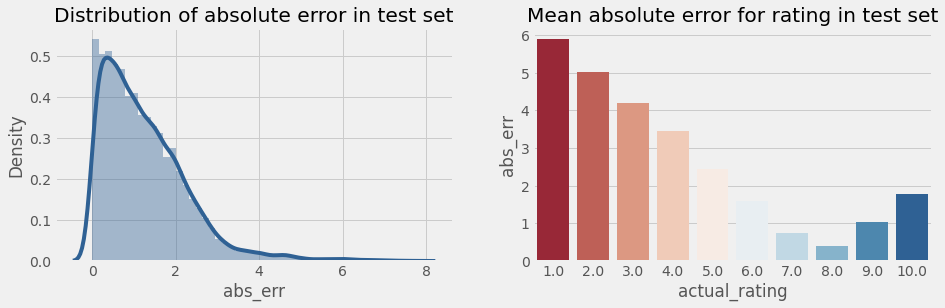

In [127]:
df_pred_err = pred_df.groupby('actual_rating')['abs_err'].mean().reset_index() #grouping

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(pred_df['abs_err'], color='#2f6194', ax=ax1) #plot abs errror
ax1.set_title('Distribution of absolute error in test set')

palette = sns.color_palette("RdBu", 10)
sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)#Mean absolute error
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

####Here we can observed that the distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

In [128]:
df_books = book.copy()
df_new = df.merge(df_books[['ISBN', 'title']], on='ISBN', how='left')
df_new = df_new.merge(pred_df[['ISBN', 'user_id', 'pred_rating']], on=['ISBN', 'user_id'], how='left')

Train Set

In [133]:
# Taking an arbitrary user-id and item-id to test our model.
selected_user_id = 225379
df_user = df_new[df_new['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['rating']>=9)].sample(5)

,user_id,ISBN,rating,title_x,author,year,publisher,total_ratings,location,age,title_y,pred_rating
11853,225379,0345339681,10,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,1986,Del Rey,161,"halifax, nova scotia, canada",24,The Hobbit : The Enchanting Prelude to The Lord of the Rings,NaN
28481,225379,0345339711,10,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,Del Rey,136,"halifax, nova scotia, canada",24,"The Two Towers (The Lord of the Rings, Part 2)",NaN
60334,225379,0345339738,10,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,1986,Del Rey,103,"halifax, nova scotia, canada",24,"The Return of the King (The Lord of the Rings, Part 3)",NaN
27666,225379,0345313860,10,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books,143,"halifax, nova scotia, canada",24,"The Vampire Lestat (Vampire Chronicles, Book II)",NaN
63976,225379,0452279615,10,"The Drawing of the Three (The Dark Tower, Book 2)",Stephen King,1997,Plume Books,88,"halifax, nova scotia, canada",24,"The Drawing of the Three (The Dark Tower, Book 2)",NaN


Test set

In [134]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(3)

,user_id,ISBN,rating,title_x,author,year,publisher,total_ratings,location,age,title_y,pred_rating
26200,225379,0618002227,10,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J. R. R. Tolkien,1999,Houghton Mifflin Company,205,"halifax, nova scotia, canada",24,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",8.668778
25386,225379,0380973634,8,Neverwhere,Neil Gaiman,1997,William Morrow,146,"halifax, nova scotia, canada",24,Neverwhere,8.336120
31260,225379,0441003257,10,Good Omens,Neil Gaiman,1996,Ace Books,87,"halifax, nova scotia, canada",24,Good Omens,8.160289


Actual set

In [135]:
df_user[df_user['pred_rating'].notna()].sort_values('rating', ascending=False).head(3)

,user_id,ISBN,rating,title_x,author,year,publisher,total_ratings,location,age,title_y,pred_rating
26200,225379,0618002227,10,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J. R. R. Tolkien,1999,Houghton Mifflin Company,205,"halifax, nova scotia, canada",24,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",8.668778
31260,225379,0441003257,10,Good Omens,Neil Gaiman,1996,Ace Books,87,"halifax, nova scotia, canada",24,Good Omens,8.160289
25386,225379,0380973634,8,Neverwhere,Neil Gaiman,1997,William Morrow,146,"halifax, nova scotia, canada",24,Neverwhere,8.336120


####Yes!!!  Here we have good results.

###**Conclusion**

* While performing Explonatory Data Analysis we observed that 
  * We saw that 'selected poems' are highest in number.
  * We saw that user with locations London,england,united kingdom,toronto,ontario,canda are high in numbers.
  * we saw that autors Agatha Christie,William Shakespeare,Stephen King,Ann M. Martin,Carolyn keene are top authors.

* KNN model gave us good recomandation for books.

* We deployed the recommendation using correlation.

* Collaborative Filtering : User-Item Filtering gave us good recommendation.

* Svd model gave us result better than nmf model.

* Model SVD(Singular value decompostion) results showed that our proposed system can remove boring books from the recommendation list more efficiently

* We can deploy all this models.